In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

import json

url_covid = "https://api.covidtracking.com/v1/us/daily.json"

def importar_datos(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        print("Se ha podido obtener los datos correctamente")
        return data
    else:
        print("No se pudo obtener los datos")

def procesar_datos(datos):
    lista_death = []
    for dato_diario in datos:
        muertes = dato_diario["death"]
        if muertes != None:
            lista_death.append(muertes)

    return lista_death



# paso nro 1: Importar datos
datos = importar_datos(url=url_covid)

# paso nro 2: Procesar datos
datos_procesados = procesar_datos(datos)


print(len(datos_procesados))

print(datos_procesados)

Se ha podido obtener los datos correctamente
392
[515151, 514309, 512629, 510408, 508665, 506216, 504488, 503247, 502196, 500349, 498208, 495070, 492623, 490382, 489147, 487860, 485700, 483223, 480607, 478259, 476906, 475828, 474462, 470995, 465568, 461695, 458250, 455455, 454146, 452671, 449677, 446134, 440922, 437237, 433751, 432189, 430130, 427148, 423645, 419634, 415557, 411823, 410230, 408286, 404695, 400715, 396837, 392428, 390287, 388892, 386839, 383130, 379451, 375536, 371449, 367385, 365652, 363584, 360047, 356267, 352188, 348286, 344802, 343255, 341800, 339394, 336802, 333505, 329605, 326316, 324826, 323429, 322003, 320450, 317492, 314099, 310962, 309482, 307814, 305106, 302240, 298775, 295322, 292398, 291041, 289540, 287043, 284296, 281164, 277995, 275315, 274024, 272861, 270375, 267812, 264990, 262179, 259690, 258653, 257828, 256585, 255181, 253789, 251508, 249417, 248564, 247641, 246090, 244180, 242170, 240285, 238732, 238125, 237413, 236060, 234759, 233647, 232070, 230712

In [2]:
url = "https://api.covidtracking.com/v1/us/daily.json"
df = pd.read_json(url)
df.shape

# Como los datos se terminan de recoger el 7 de marzo de 2021, hemos filtrado los datos de todos los que nos parecían relevantes y todos aquellos que ponen "Currently" ya que no es la actualidad real.

df.drop(columns=["hash",  "onVentilatorCurrently", "recovered", "lastModified", "inIcuCurrently", "dateChecked", "pending", "states"], inplace=True)
df



,date,positive,negative,hospitalizedCurrently,hospitalizedCumulative,inIcuCumulative,onVentilatorCumulative,death,hospitalized,totalTestResults,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20210307,28756489.0,74582825.0,40199.0,776361.0,45475.0,4281.0,515151.0,776361.0,363825123,0,0,842,726,131835,41835,1170059
1,20210306,28714654.0,74450990.0,41401.0,775635.0,45453.0,4280.0,514309.0,775635.0,362655064,0,0,1680,503,143835,60015,1430992
2,20210305,28654639.0,74307155.0,42541.0,775132.0,45373.0,4275.0,512629.0,775132.0,361224072,0,0,2221,2781,271917,68787,1744417
3,20210304,28585852.0,74035238.0,44172.0,772351.0,45293.0,4267.0,510408.0,772351.0,359479655,0,0,1743,1530,177957,65487,1590984
4,20210303,28520365.0,73857281.0,45462.0,770821.0,45214.0,4260.0,508665.0,770821.0,357888671,0,0,2449,2172,267001,66836,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20200117,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
416,20200116,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
417,20200115,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
418,20200114,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [3]:

df_filtered = df.dropna(subset=["positive", "hospitalizedCurrently", "hospitalizedCumulative"]).copy()


df_filtered.loc[:, "prob_hosp_given_positive_daily"] = df_filtered["hospitalizedCurrently"] / df_filtered["positive"]
df_filtered.loc[:, "prob_hosp_given_positive_acum"] = df_filtered["hospitalizedCumulative"] / df_filtered["positive"]


prob_promedio_diaria = df_filtered["prob_hosp_given_positive_daily"].mean()
prob_promedio_acumulada = df_filtered["prob_hosp_given_positive_acum"].mean()

print(f"Probabilidad promedio diaria de ingresar en el hospital dado que eres positivo: {prob_promedio_diaria:.4f} ({prob_promedio_diaria*100:.2f}%)")
print(f"Probabilidad acumulada de hospitalización dado positivo: {prob_promedio_acumulada:.4f} ({prob_promedio_acumulada*100:.2f}%)")



Probabilidad promedio diaria de ingresar en el hospital dado que eres positivo: 0.0184 (1.84%)
Probabilidad acumulada de hospitalización dado positivo: 0.0411 (4.11%)


In [4]:
df['positivity_rate'] = df['positive'] / (df['positive'] + df['negative'])
media_tasa = df['positivity_rate'].mean()
print("Promedio de tasa de positividad:", media_tasa)
max_tasa = df['positivity_rate'].max()
min_tasa = df['positivity_rate'].min()

print("Máxima tasa:", max_tasa)
print("Mínima tasa:", min_tasa)



Promedio de tasa de positividad: 0.23812954294821115
Máxima tasa: 0.96
Mínima tasa: 0.17441199334756086


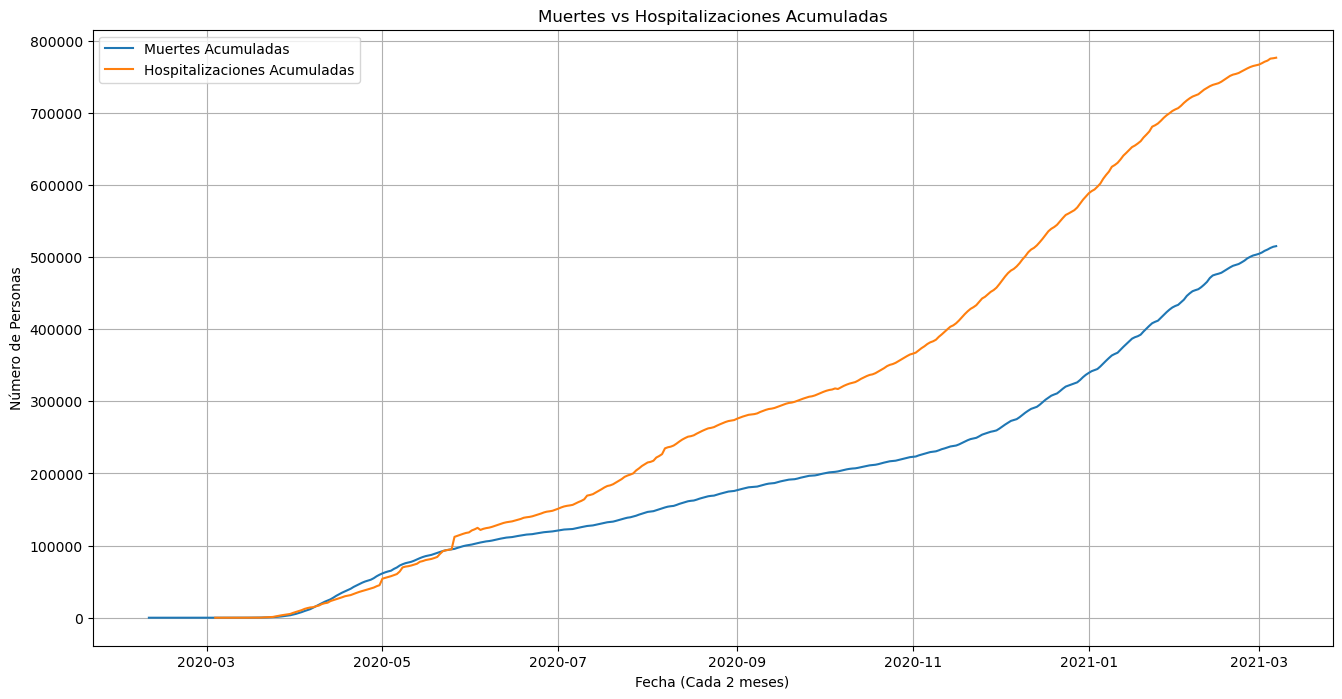

In [5]:

#df = pd.DataFrame()
#df = pd.read_csv(filepath_or_buffer = "https://api.covidtracking.com/v1/us/daily.csv")
url = "https://api.covidtracking.com/v1/us/daily.json"
df = pd.read_json(url)

df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
plt.figure(figsize=(16,8))
plt.plot(df['date'], df['death'], label='Muertes Acumuladas')
plt.plot(df['date'], df['hospitalizedCumulative'], label='Hospitalizaciones Acumuladas')
plt.title("Muertes vs Hospitalizaciones Acumuladas")
plt.xlabel("Fecha (Cada 2 meses)")
plt.ylabel("Número de Personas")
plt.legend()
plt.grid()
plt.show()

Resultados:
- A medida que aumentan las hospitalizaciones, también lo hacen las muertes, lo cual refleja el fuerte impacto que tuvo la pandemia sobre el sistema de salud.
- Aunque se pudieron haber implementado medidas, estas no fueron suficientes inicialmente para frenar el aumento de muertes

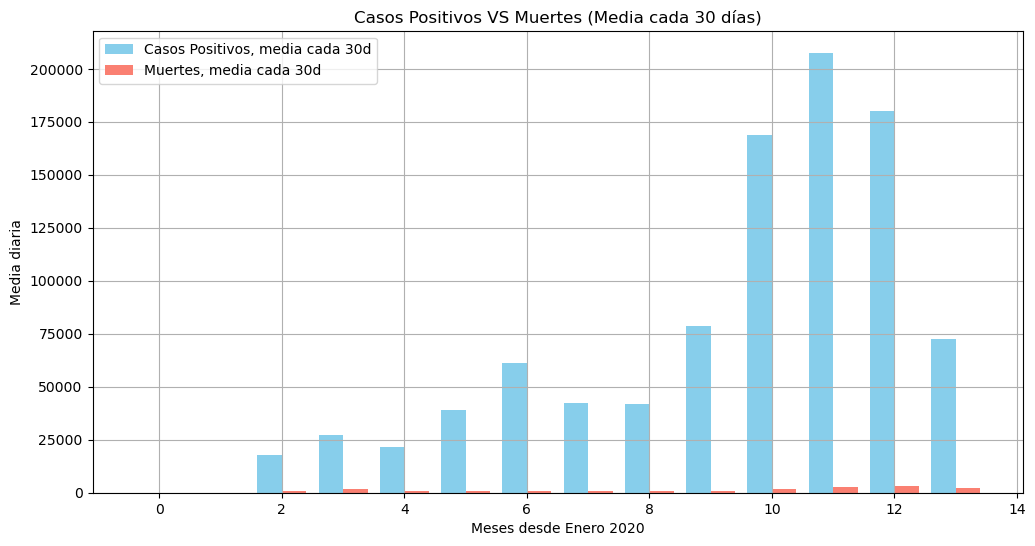

In [7]:

#Leer datos
df =  pd.read_json (url_covid)

#Formatear fecha y ordenar cronológicamente
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df = df.sort_values ("date")

#Agrupar por promedios de 30 días
df_30d  =df.resample ("30D", on = "date")[["positiveIncrease","deathIncrease"]].mean().dropna()

#Preparar datos para barplot
x_labels = df_30d.index.strftime ("%Y-%m-%d")
x_barras = range(len(df_30d))
width = 0.4

#Graficar
plt.figure(figsize=(12,6))
plt.bar ([x - width/2 for x in x_barras], df_30d["positiveIncrease"],width=width, label = "Casos Positivos, media cada 30d", color = "skyblue")
plt.bar ([x +  width/2 for x in x_barras], df_30d["deathIncrease"], width=width, label =  "Muertes, media cada 30d", color = "salmon")

#plt.xticks (x_barras, x_labels, rotation = 45, ha="right")
plt.title ("Casos Positivos VS Muertes (Media cada 30 días)")
plt.xlabel  ("Meses desde Enero 2020")
plt.ylabel ("Media diaria")
plt.legend()
plt.grid()

#plt.tight_layout()
plt.show()

df_filtrado = df[["positiveIncrease", "deathIncrease"]].dropna()




Resultados:
- Se pueden ver los picos más altos de contagios, seguidos por un aumento en muertes 
- Identificamos 3 olas de pandemia 

La correlación entre casos positivos nuevos y muertes nuevas diarias es: 0.715
La correlación entre muertes nuevas diarias y hospitalizaciones nuevas diarias es: 0.653


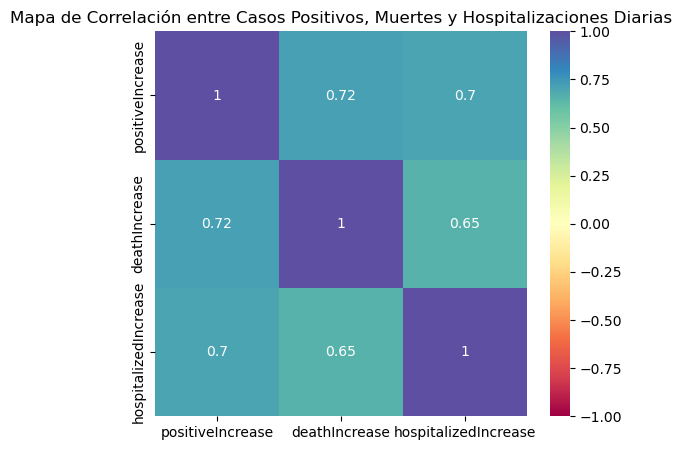

In [8]:


df_filtrado = df[["positiveIncrease", "deathIncrease", "hospitalizedIncrease"]].dropna()
corr_matrix = df_filtrado.corr()

correlacion = df_filtrado["positiveIncrease"].corr(df_filtrado["deathIncrease"])
correlacion_mh = df_filtrado["deathIncrease"].corr(df_filtrado["hospitalizedIncrease"])

print(f"La correlación entre casos positivos nuevos y muertes nuevas diarias es: {correlacion:.3f}")
print(f"La correlación entre muertes nuevas diarias y hospitalizaciones nuevas diarias es: {correlacion_mh:.3f}")

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title("Mapa de Correlación entre Casos Positivos, Muertes y Hospitalizaciones Diarias")
plt.show()

Resultados:
- En los 3 casos existe una correlación positiva fuerte (0,72, 0,7 y 0,65).
- Cuando suben los casos positivos, suben las muertes
- Al incluir las hospitalizaciones diarias en el análisis, encontramos que existe una correlación positiva significativa entre muertes diarias y aumento de hospitalizaciones, lo cual es lógico: a mayor número de pacientes hospitalizados, es más probable que también aumenten los fallecimientos.

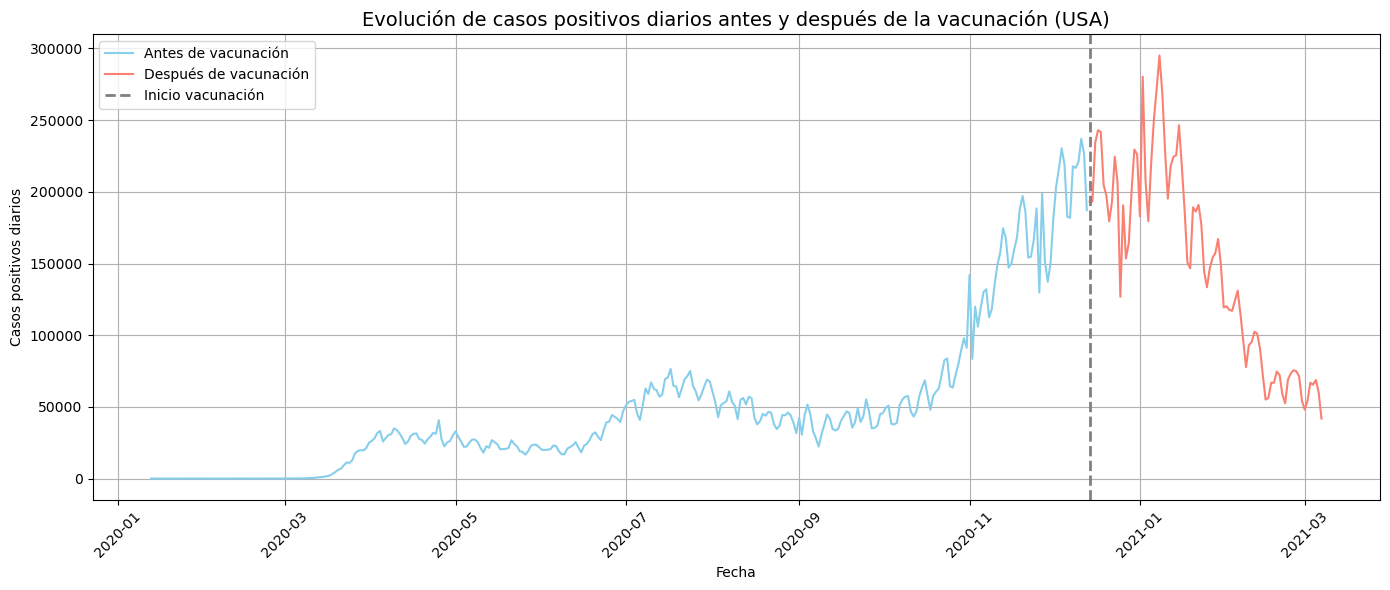

In [ ]:
# Evolución de casos positivos diarios con inicio de vacunación

fecha_vacunacion = pd.Timestamp("2020-12-14")

df_antes = df[df["date"] < fecha_vacunacion]
df_despues = df[df["date"] >= fecha_vacunacion]

plt.figure(figsize=(14, 6))

plt.plot(df_antes["date"], df_antes["positiveIncrease"], color="skyblue", label="Antes de vacunación")


plt.plot(df_despues["date"], df_despues["positiveIncrease"], color="salmon", label="Después de vacunación")


plt.axvline(fecha_vacunacion, color="gray", linestyle="--", linewidth=2, label="Inicio vacunación")


plt.title("Evolución de casos positivos diarios antes y después de la vacunación (USA)", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Casos positivos diarios")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Resultados: vacunación dicimbre 2020
A pasear de que no hay relevancia estdística de datos luego de la vacunación en Dicimbre del 2020, podemos ver que la tendencia de los casos positivos es a la baja.


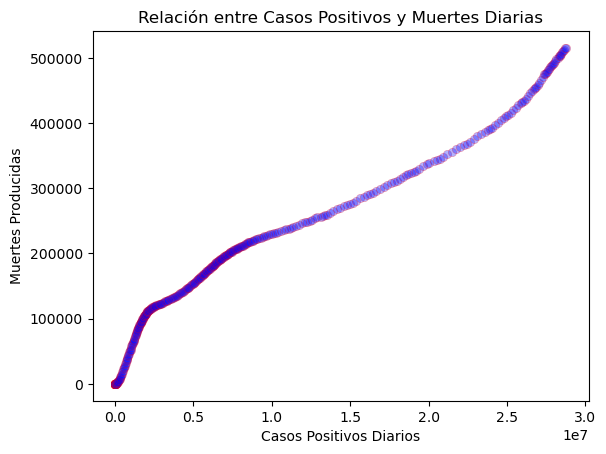

In [10]:
sns.scatterplot(x = df["positive"], y = df["death"], alpha = 0.3, color = "blue", edgecolor="red")
plt.title("Relación entre Casos Positivos y Muertes Diarias")
plt.xlabel("Casos Positivos Diarios")
plt.ylabel("Muertes Producidas")
plt.grid
plt.show()

Resultados:
- En está gráfica se puede ver claramente conforme aumentan los casos positivos de Covid-19, también aumentan los fallecimientos causados por la enfermedad. 
- En este caso no se observa ningún outliers (valores atípicos), ya que solamente estamos observando casos de muertes producidos por la misma enfermedad. 
si que es verdad que se ve una pendiente más extrema al inicio de la pandemia mientras que hacía el final se va suavizando un poco.

In [ ]:
# segunda derivada

df = df.sort_values("date")
df["cambios diarios"] = df["positiveIncrease"].diff()
df["segunda diferencia"] = df["cambios diarios"].diff()


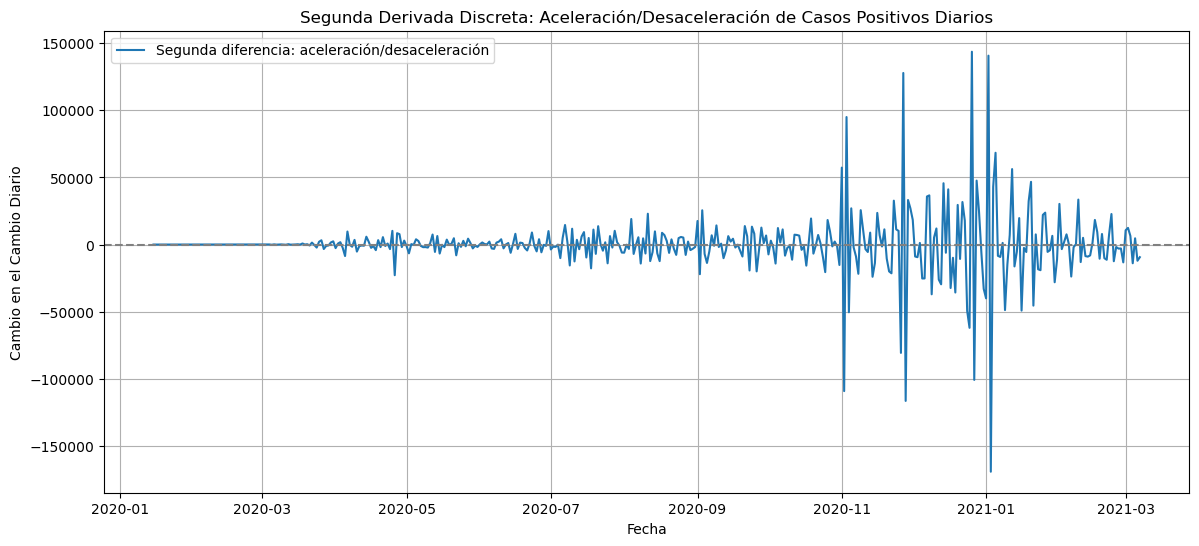

In [12]:
# cambio en el cambio diario??? WHAT IS THIS?!
# hay que poder explicar bien los resultados de está gráfica

plt.figure(figsize=(14,6))
plt.plot(df["date"], df["segunda diferencia"], label="Segunda diferencia: aceleración/desaceleración")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Segunda Derivada Discreta: Aceleración/Desaceleración de Casos Positivos Diarios")
plt.xlabel("Fecha")
plt.ylabel("Cambio en el Cambio Diario")
plt.legend()
plt.grid(True)
plt.show()


Resultados:
- La segunda derivada representa la aceleración o desaceleración de nuevos casos diarios. En el eje Y vemos cuánto cambia la cantidad; valores positivos indican número de casos que está acelerando, mientras que valores negativos indican una desaceleración. En el eje X tenemos la fecha, desde inicio de marzo de 2020 hasta aproximadamente marzo de 2021.
- Lo que se puede observar es que durante los primeros meses la variación es mínima, lo que es coherente con los primeros momentos de la pandemia. A partir de mediados de 2020, y especialmente desde octubre/noviembre de 2020, se observan oscilaciones más grandes y frecuentes, lo que sugiere alta inestabilidad en la evolución de los casos.
- Se destacan picos extremos positivos y negativos, especialmente a finales de 2020 e inicios de 2021. Esta gráfica nos indica bien lo nombrado anteriormente, pero analizando el contexto, podemos ver el caos que sufríamos con tanto desnivel: no seguía una progresión ni disminución lineal.

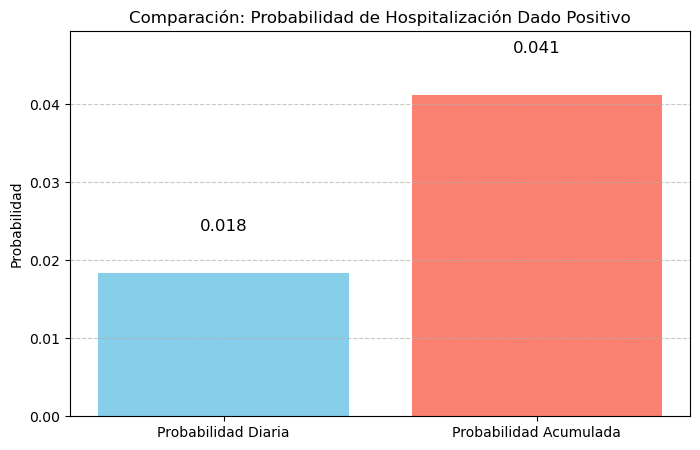

In [13]:

probabilidades = [prob_promedio_diaria, prob_promedio_acumulada]
nombres = ['Probabilidad Diaria', 'Probabilidad Acumulada']

plt.figure(figsize=(8,5))
bars = plt.bar(nombres, probabilidades, color=['skyblue', 'salmon'])
plt.ylim(0, max(probabilidades)*1.2)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.3f}", ha='center', va='bottom', fontsize=12)

plt.title('Comparación: Probabilidad de Hospitalización Dado Positivo')
plt.ylabel('Probabilidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Resultados:

           positive      negative  hospitalizedCurrently  \
count  4.190000e+02  3.720000e+02             356.000000   
mean   8.116687e+06  3.030351e+07           57987.117978   
std    8.967432e+06  2.407815e+07           31898.555998   
min    0.000000e+00  2.000000e+00             325.000000   
25%    1.004386e+06  6.753778e+06           35100.500000   
50%    5.044337e+06  2.757246e+07           48811.000000   
75%    1.234137e+07  5.084301e+07           70519.250000   
max    2.875649e+07  7.458282e+07          132474.000000   

       hospitalizedCumulative  deathIncrease  
count              369.000000     420.000000  
mean            310817.140921    1226.550000  
std             235557.870159    1070.129644  
min                  4.000000       0.000000  
25%             123250.000000     439.750000  
50%             280138.000000    1016.000000  
75%             481309.000000    1642.500000  
max             776361.000000    5427.000000  


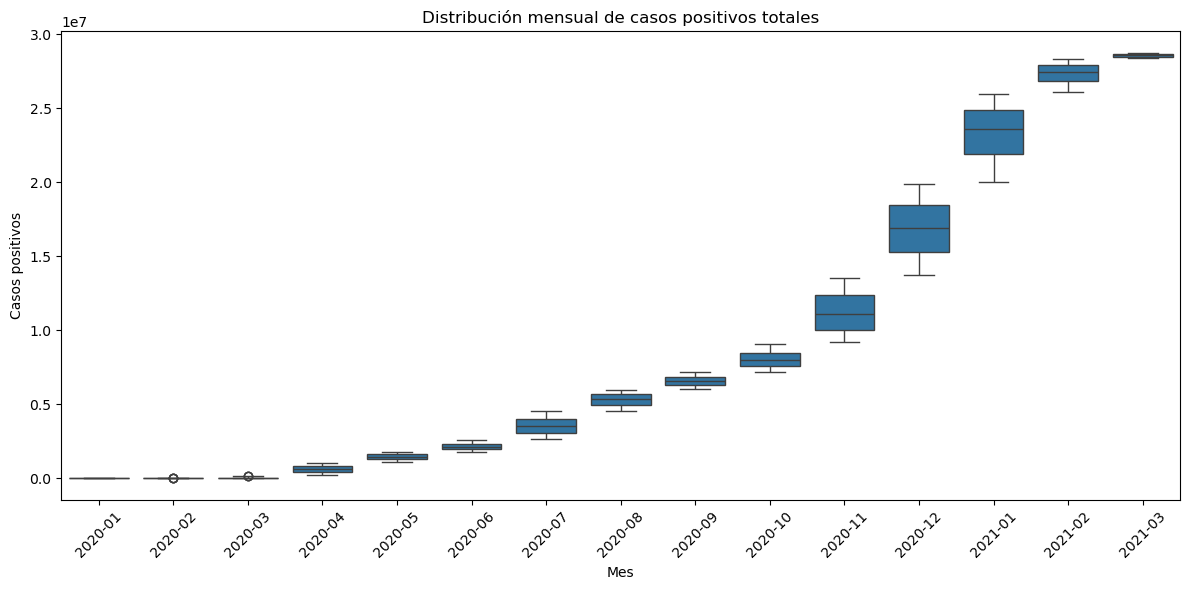

In [14]:

columnas = ['positive', 'negative', 'hospitalizedCurrently', 'hospitalizedCumulative', 'deathIncrease']
estadisticas = {}

for col in columnas:
    estadisticas[col] = df[col].describe()

estadisticas_df = pd.DataFrame(estadisticas)
print(estadisticas_df)

df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
df["mes"] = df["date"].dt.to_period("M")
df = df.sort_values("date")
plt.figure(figsize=(12, 6))
sns.boxplot(x="mes", y="positive", data=df)
plt.xticks(rotation=45)
plt.title("Distribución mensual de casos positivos totales")
plt.xlabel("Mes")
plt.ylabel("Casos positivos")
plt.tight_layout()
plt.show()

Resultados: